In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-no

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import tensorflow

In [3]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [4]:
batch_size=128
num_classes=10
epochs=20


In [5]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print('Shape-x:\t',xtrain.shape)
print('Shape-y:\t',ytrain.shape)


Shape-x:	 (60000, 28, 28)
Shape-y:	 (60000,)


In [6]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)
print('Shape-x-train:\t',xtrain.shape)
print('Shape-x-Test:\t',xtest.shape)


Shape-x-train:	 (60000, 784)
Shape-x-Test:	 (10000, 784)


In [7]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')


In [8]:
xtrain=xtrain/255.
xtest=xtest/255.
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

60000 train samples
10000 test samples


# Convert class vectors to binary class matrices

In [9]:
import keras
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [10]:
ytrain.shape

(60000, 10)

# Sequencial Model

In [11]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile & Fit the model

In [12]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [13]:
history=model.fit(xtrain,ytrain,
 batch_size=batch_size,
 epochs=epochs,
 verbose=2,
 validation_data=(xtest,ytest))
score=model.evaluate(xtest,ytest,verbose=1)

Epoch 1/20
469/469 - 6s - loss: 0.5372 - accuracy: 0.8026 - val_loss: 0.4616 - val_accuracy: 0.8243 - 6s/epoch - 12ms/step
Epoch 2/20
469/469 - 4s - loss: 0.3731 - accuracy: 0.8622 - val_loss: 0.4069 - val_accuracy: 0.8543 - 4s/epoch - 9ms/step
Epoch 3/20
469/469 - 4s - loss: 0.3301 - accuracy: 0.8779 - val_loss: 0.3707 - val_accuracy: 0.8659 - 4s/epoch - 9ms/step
Epoch 4/20
469/469 - 5s - loss: 0.3033 - accuracy: 0.8866 - val_loss: 0.3395 - val_accuracy: 0.8793 - 5s/epoch - 10ms/step
Epoch 5/20
469/469 - 5s - loss: 0.2851 - accuracy: 0.8921 - val_loss: 0.3444 - val_accuracy: 0.8755 - 5s/epoch - 11ms/step
Epoch 6/20
469/469 - 5s - loss: 0.2691 - accuracy: 0.9000 - val_loss: 0.3267 - val_accuracy: 0.8800 - 5s/epoch - 11ms/step
Epoch 7/20
469/469 - 7s - loss: 0.2557 - accuracy: 0.9041 - val_loss: 0.4053 - val_accuracy: 0.8620 - 7s/epoch - 14ms/step
Epoch 8/20
469/469 - 7s - loss: 0.2427 - accuracy: 0.9071 - val_loss: 0.3852 - val_accuracy: 0.8684 - 7s/epoch - 15ms/step
Epoch 9/20
469/469

In [14]:
print('Test Loss:\t',score[0])
print('Test Accuracy:\t',score[1])

Test Loss:	 0.474993497133255
Test Accuracy:	 0.8741999864578247


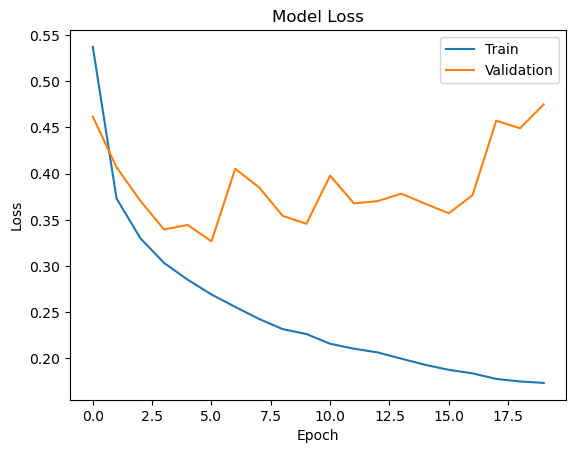

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()